##  实例 1 将分组后的字符拼接

In [3]:
import pandas as pd
df=pd.DataFrame({
    'user_id':[1,2,1,3,3],
    'content_id':[1,1,2,2,2],
    'tag':['cool','nice','clever','clever','not-bad']
})
df

,content_id,tag,user_id
0,1,cool,1
1,1,nice,2
2,2,clever,1
3,2,clever,3
4,2,not-bad,3


将df按content_id分组，然后将每组的tag用逗号拼接

In [9]:
df.groupby('content_id')['tag'].apply(lambda x:','.join(x)).to_frame()

,tag
content_id,
1,"cool,nice"
2,"clever,clever,not-bad"


## 实例2 统计每个content_id有多少个不同的用户

In [12]:
import pandas as pd

df = pd.DataFrame({
    'user_id':[1,2,1,3,3,],
    'content_id':[1,1,2,2,2],
    'tag':['cool','nice','clever','clever','not-bad']
})

df.groupby("content_id")["user_id"].nunique().to_frame()

,user_id
content_id,
1,2
2,2


## 实例3 分组结果排序

In [16]:
import pandas as pd

df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})
df

,product,value
0,table,20.45
1,chair,22.89
2,chair,32.12
3,mobile phone,111.22
4,table,33.22
5,mobile phone,100.00
6,table,99.99


In [18]:
df1 = df.groupby('product')['value'].sum().to_frame().reset_index()
df1

,product,value
0,chair,55.01
1,mobile phone,211.22
2,table,153.66


In [19]:
df2 = df.groupby('product')['value'].sum().to_frame().reset_index().sort_values(by='value')
df2

,product,value
0,chair,55.01
2,table,153.66
1,mobile phone,211.22


## 实例4 分组大小绘图

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})
df

,product,value
0,table,20.45
1,chair,22.89
2,chair,32.12
3,mobile phone,111.22
4,table,33.22
5,mobile phone,100.00
6,table,99.99


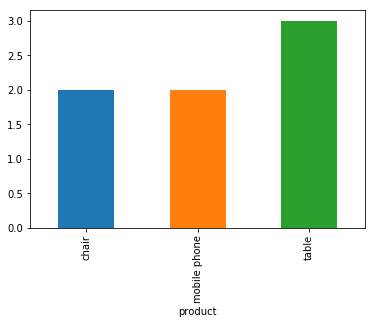

In [21]:
plt.clf()
df.groupby('product').size().plot(kind='bar')
plt.show()

## 实例5 分组求和绘图

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})
df

,product,value
0,table,20.45
1,chair,22.89
2,chair,32.12
3,mobile phone,111.22
4,table,33.22
5,mobile phone,100.00
6,table,99.99


<Figure size 432x288 with 0 Axes>

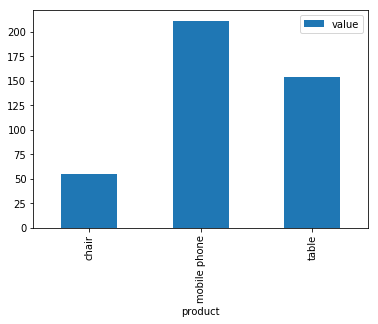

In [23]:
plt.clf()
df.groupby('product').sum().plot(kind='bar')
plt.show()

## 实例 6 使用agg函数

In [28]:
import pandas as pd

df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})

grouped_df = df.groupby('product').agg({'value':['min','max','mean']})
grouped_df

value                 
                 min     max     mean
product                              
chair          22.89   32.12   27.505
mobile phone  100.00  111.22  105.610
table          20.45   99.99   51.220

In [29]:
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df = grouped_df.reset_index()
grouped_df

,product,value_min,value_max,value_mean
0,chair,22.89,32.12,27.505
1,mobile phone,100.00,111.22,105.610
2,table,20.45,99.99,51.220


## 实例7 遍历分组

In [32]:
for key,group_df in df.groupby('product'):
    print("the group for product '{}' has {} rows".format(key,len(group_df)))  

the group for product 'chair' has 2 rows
the group for product 'mobile phone' has 2 rows
the group for product 'table' has 3 rows


http://queirozf.com/entries/pandas-dataframe-groupby-examples#flatten-hierarchical-indices-created-by-agg